In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\Sharath Reddy\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv("SEER Breast Cancer Dataset .csv")


In [3]:
df.shape

(4024, 16)

In [4]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [5]:
df.tail()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [7]:
df.isna().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [8]:
!pip install data-quality-tests

In [9]:
#importing libariers
#data quality
from data_quality_tests import DataQuality as dq

In [10]:
dq.data_quality_check(df)

[=================================================================]


TEST CASE NULL VALUES: Failed

TEST CASE DUPLICATE VALUES: Failed

TEST CASE DTYPE MATCHING: Passed

TEST CASE OUTLIERS: Failed

TEST CASE COLUMN HEADER WHITESPACES: Failed

------------------------------------------------------------
[=================================================================]


In [11]:
df.drop(['Unnamed: 3'],axis=1,inplace=True) 

In [12]:
duplicate=df[df.duplicated()]
duplicate

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1010,63,White,Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,17,Positive,Positive,9,1,56,Alive


In [13]:
df=df.drop_duplicates()

In [14]:
df.columns=df.columns.str.replace(' ','')

In [15]:
dq.data_quality_check(df)

[=================================================================]


TEST CASE NULL VALUES: Passed

TEST CASE DUPLICATE VALUES: Passed

TEST CASE DTYPE MATCHING: Passed

TEST CASE OUTLIERS: Failed

TEST CASE COLUMN HEADER WHITESPACES: Passed

------------------------------------------------------------
[=================================================================]


In [16]:
df.shape

(4023, 15)

In [17]:
df.columns

Index(['Age', 'Race', 'MaritalStatus', 'TStage', 'NStage', '6thStage', 'Grade',
       'AStage', 'TumorSize', 'EstrogenStatus', 'ProgesteroneStatus',
       'RegionalNodeExamined', 'ReginolNodePositive', 'SurvivalMonths',
       'Status'],
      dtype='object')

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4023.0,53.969923,8.963118,30.0,47.0,54.0,61.0,69.0
TumorSize,4023.0,30.477007,21.121253,1.0,16.0,25.0,38.0,140.0
RegionalNodeExamined,4023.0,14.358439,8.100241,1.0,9.0,14.0,19.0,61.0
ReginolNodePositive,4023.0,4.158837,5.109724,1.0,1.0,2.0,5.0,46.0
SurvivalMonths,4023.0,71.301765,22.923009,1.0,56.0,73.0,90.0,107.0


# univariate analysis


In [19]:
df['Status'].unique() 

array(['Alive', 'Dead'], dtype=object)

In [20]:
  df['Status'].value_counts()   
    #imbalenced data

Alive    3407
Dead      616
Name: Status, dtype: int64

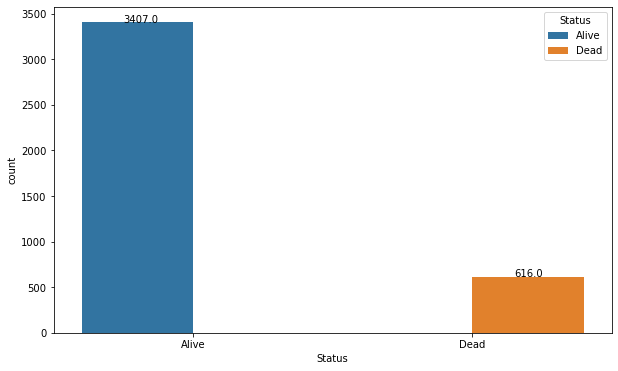

In [21]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x="Status",hue="Status")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.01))


# independent Attributes

In [22]:
df.Age.describe()

count    4023.000000
mean       53.969923
std         8.963118
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64

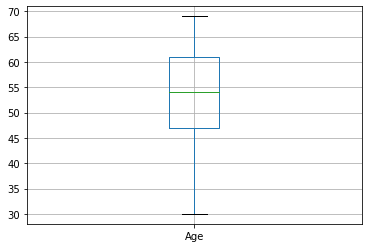

In [23]:
df.boxplot(column="Age")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

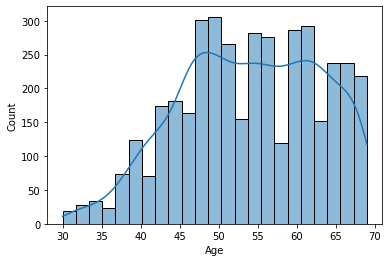

In [24]:
sns.histplot(df,x="Age",kde=True)

# 2.numerical Attribute

In [25]:
df.TumorSize.describe()

count    4023.000000
mean       30.477007
std        21.121253
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: TumorSize, dtype: float64

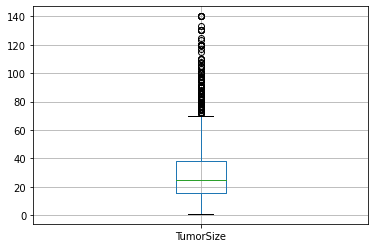

In [26]:
df.boxplot(column="TumorSize")
plt.show()

<AxesSubplot:xlabel='TumorSize', ylabel='Count'>

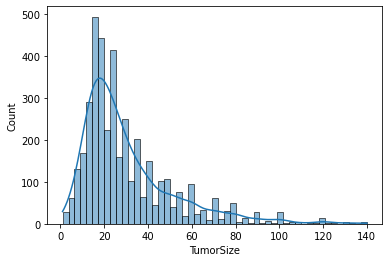

In [27]:
sns.histplot(df,x="TumorSize",kde=True)

In [28]:
df.RegionalNodeExamined.describe()

count    4023.000000
mean       14.358439
std         8.100241
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        61.000000
Name: RegionalNodeExamined, dtype: float64

<AxesSubplot:>

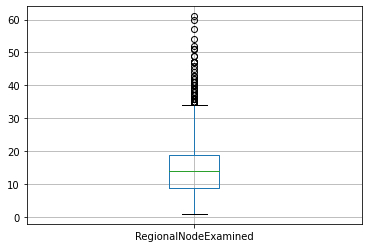

In [29]:
df.boxplot(column="RegionalNodeExamined")

<AxesSubplot:xlabel='RegionalNodeExamined', ylabel='Count'>

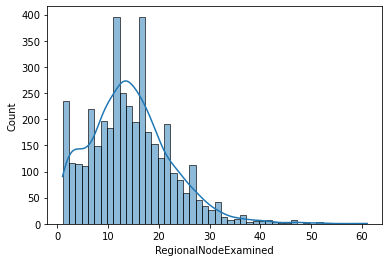

In [30]:
sns.histplot(df,x="RegionalNodeExamined",kde=True)

In [31]:
df.ReginolNodePositive.describe()

count    4023.000000
mean        4.158837
std         5.109724
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        46.000000
Name: ReginolNodePositive, dtype: float64

<AxesSubplot:>

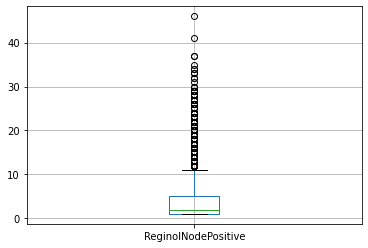

In [32]:
df.boxplot(column="ReginolNodePositive")

<AxesSubplot:xlabel='ReginolNodePositive', ylabel='Count'>

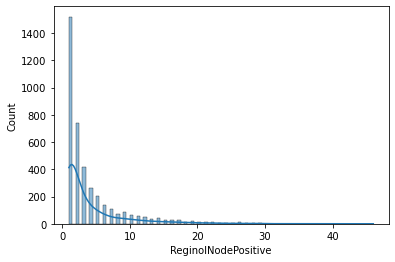

In [33]:
sns.histplot(df,x="ReginolNodePositive",kde=True)

In [34]:
df.SurvivalMonths.describe()

count    4023.000000
mean       71.301765
std        22.923009
min         1.000000
25%        56.000000
50%        73.000000
75%        90.000000
max       107.000000
Name: SurvivalMonths, dtype: float64

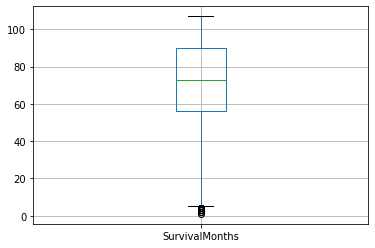

In [35]:
df.boxplot(column="SurvivalMonths")
plt.show()

<AxesSubplot:xlabel='SurvivalMonths', ylabel='Count'>

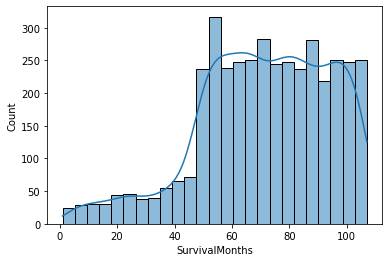

In [36]:
sns.histplot(df,x="SurvivalMonths",kde=True)

# categorial attributes

In [37]:
df.Race.describe()

count      4023
unique        3
top       White
freq       3412
Name: Race, dtype: object

In [38]:
df.Race.value_counts()

White                                                        3412
Other (American Indian/AK Native, Asian/Pacific Islander)     320
Black                                                         291
Name: Race, dtype: int64

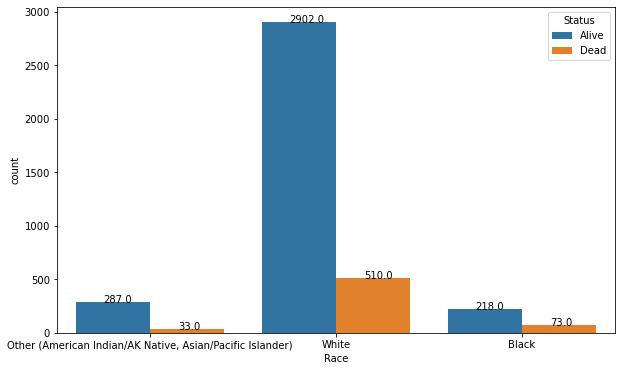

In [39]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x="Race",hue="Status")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.01))


In [40]:
df["MaritalStatus"].describe()

count                               4023
unique                                 5
top       Married (including common law)
freq                                2642
Name: MaritalStatus, dtype: object

In [41]:
df["MaritalStatus"].value_counts()

Married (including common law)    2642
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: MaritalStatus, dtype: int64

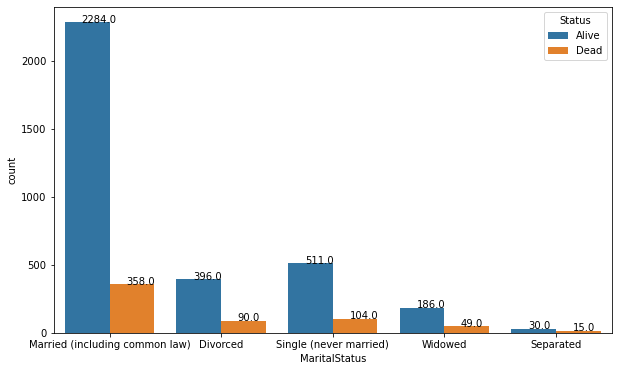

In [42]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x="MaritalStatus",hue="Status")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.01))


In [43]:
df["TStage"].describe()

count     4023
unique       4
top         T2
freq      1786
Name: TStage, dtype: object

In [44]:
df['TStage'].value_counts()

T2    1786
T1    1602
T3     533
T4     102
Name: TStage, dtype: int64

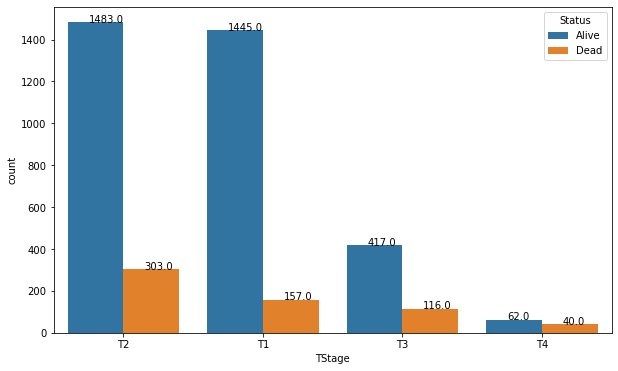

In [45]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x="TStage",hue="Status")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.01))


In [46]:
df["NStage"].describe()

count     4023
unique       3
top         N1
freq      2731
Name: NStage, dtype: object

In [47]:
df["NStage"].value_counts()

N1    2731
N2     820
N3     472
Name: NStage, dtype: int64

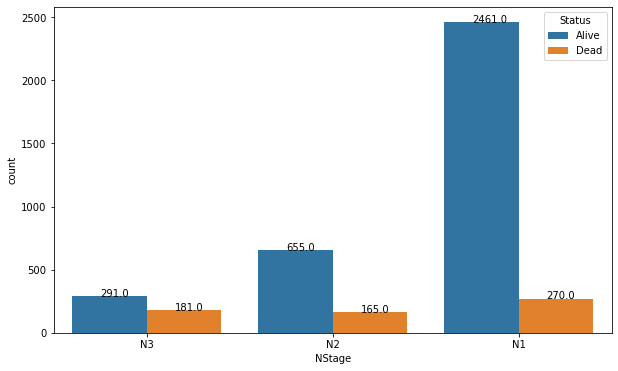

In [48]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x="NStage",hue="Status")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.01))


<AxesSubplot:>

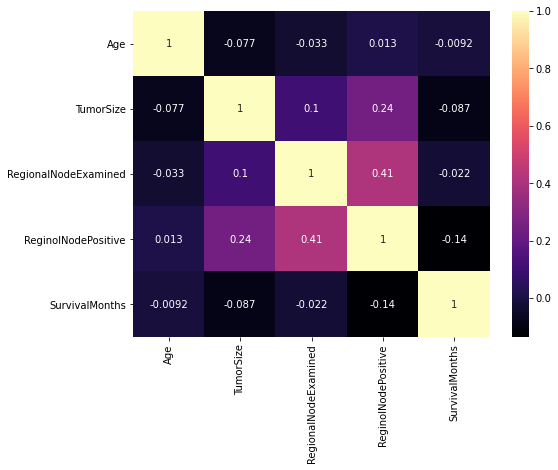

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="magma")

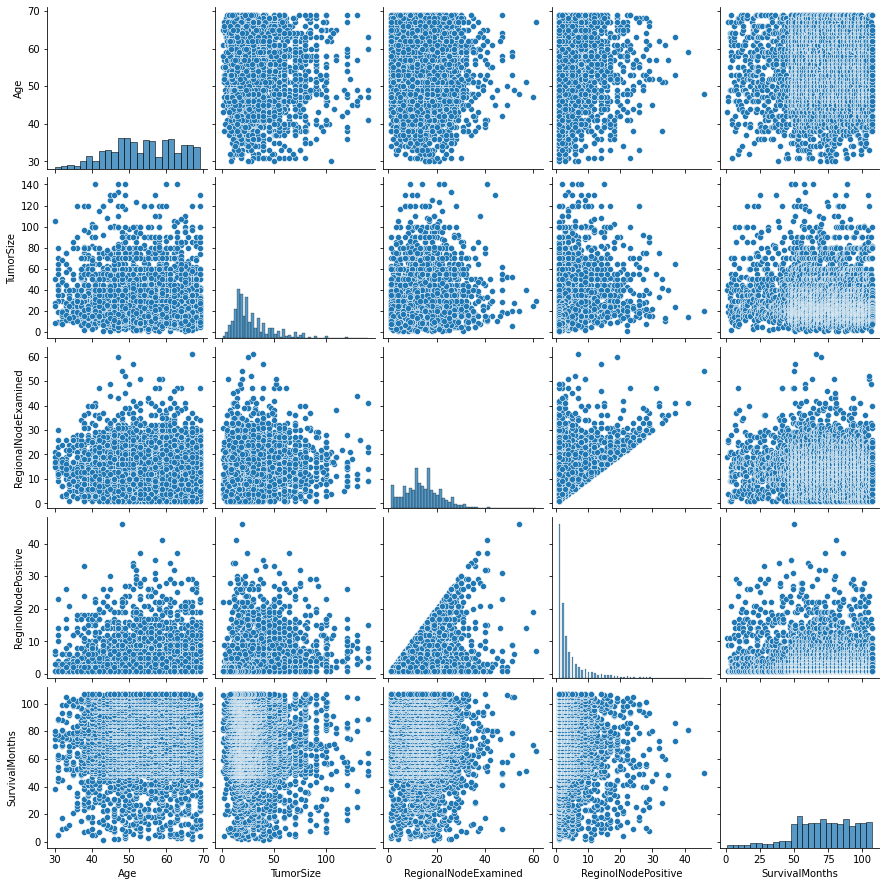

In [50]:
sns.pairplot(data=df[['Age','TumorSize','RegionalNodeExamined','ReginolNodePositive','SurvivalMonths']].dropna())
plt.show()


# Multi varient Analysis

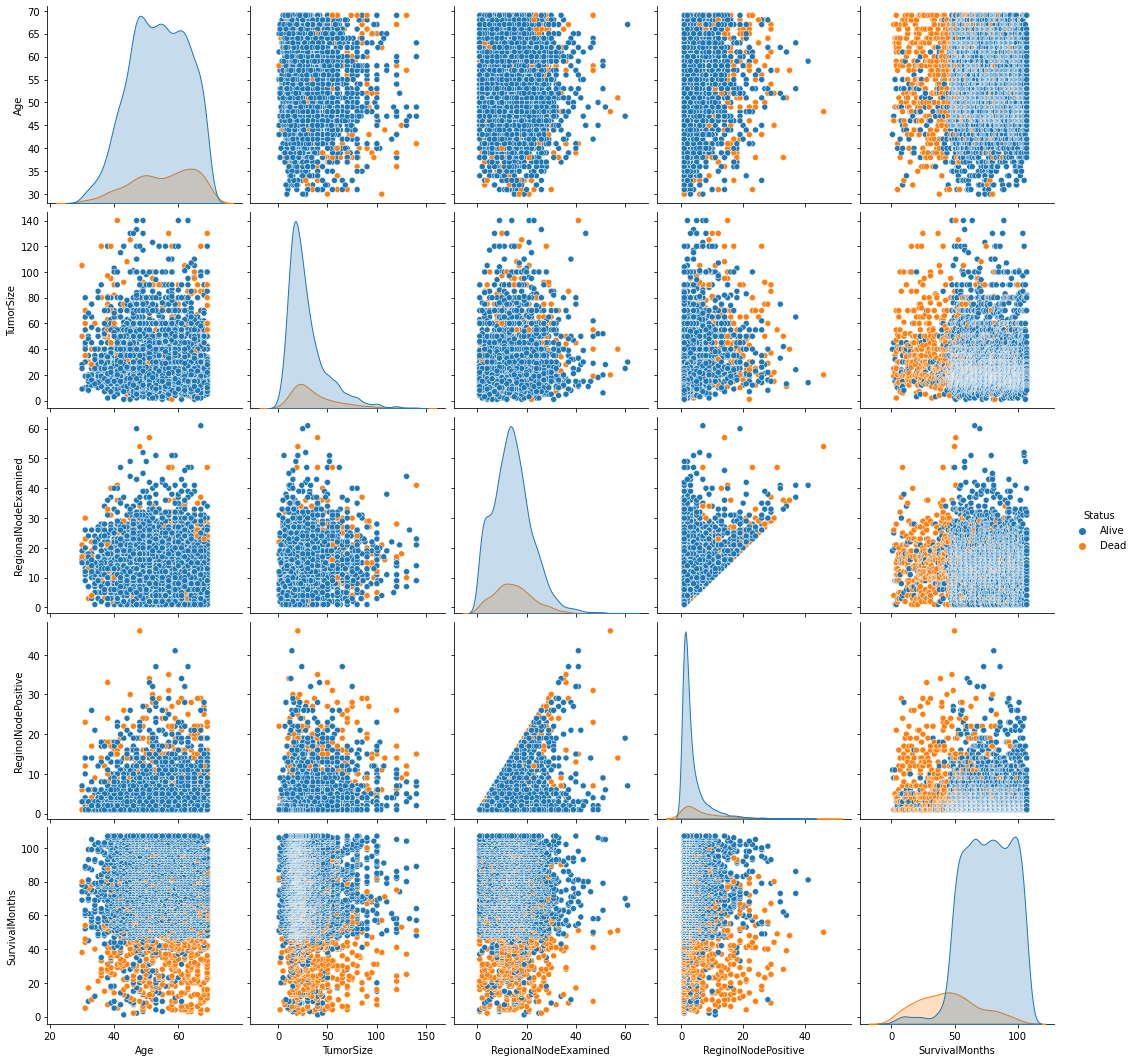

In [51]:
sns.pairplot(df,hue="Status",size=3)

In [52]:
df.to_csv("Breast_cancer_preprocessed_data.csv")